<h1>Analyzing Pamantasan ng Lungsod ng Pasig Student Sentiments Towards Professor Performance: A Naive Bayes Approach</h1>

Importing necessary libraries

In [1]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import gradio as gr
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Download NLTK Data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

c:\Users\acer\Documents\GitHub\Sentimental-analysis-of-Professor-Performance\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

<h2>DATA LOADING AND DESCRIPTION</h2>

The program starts by reading the data from the "Feedback.xlsx" file and provides an informative summary.

In [2]:
feedbacks = pd.read_excel("Feedback.xlsx")

feedbacks.head()

,Label,Comments
0,0,teacher are punctual but they should also give...
1,1,Good
2,1,Excellent lectures are delivered by teachers a...
3,1,Good
4,1,teachers give us all the information required ...


Summarization of dataset prints out total numbers per label type (-1, 0, 1)

In [3]:
# Summarizes the dataset
print("DATASET")
print("DIMENSION: ", feedbacks.shape)
print()
print("SUMMARY")
print(feedbacks.groupby("Label").size()) 
print()

DATASET
DIMENSION:  (1313, 2)

SUMMARY
Label
-1    235
 0    195
 1    883
dtype: int64



<h2>DATA PREPROCESSING</h2>

The data must undergo text cleaning and standardization to remove irrelevant information that doesn't contribute to the sentiment detection of text.

In [4]:
# Preprocessing the text
def preprocess_text(text):

    #Lowercase and Removing special characters
    lowercase_text = text.lower()
    cleaned_text = re.sub(r"[^a-zA-Z0-9\s]", "", lowercase_text) 

    # Tokenization
    tokens = word_tokenize(cleaned_text, "english")
    

    #Removal of stop words

    #Declaring English and Tagalog stop words
    stop_words = set(stopwords.words('english')) | set(["akin","aking","ako","alin","am","amin","aming","ang","ano","anumang","apat","at","atin","ating","ay","bababa","bago","bakit","bawat","bilang","dahil","dalawa","dapat","din","dito","doon","gagawin","gayunman","ginagawa","ginawa","ginawang","gumawa","gusto","habang","hanggang","hindi","huwag","iba","ibaba","ibabaw","ibig","ikaw","ilagay","ilalim","ilan","inyong","isa","isang","itaas","ito","iyo","iyon","iyong","ka","kahit","kailangan","kailanman","kami","kanila","kanilang","kanino","kanya","kanyang","kapag","kapwa","karamihan","katiyakan","katulad","kaya","kaysa","ko","kong","kulang","kumuha","kung","laban","lahat","lamang","likod","lima","maaari","maaaring","maging","mahusay","makita","marami","marapat","masyado","may","mayroon","mga","minsan","mismo","mula","muli","na","nabanggit","naging","nagkaroon","nais","nakita","namin","napaka","narito","nasaan","ng","ngayon","ni","nila","nilang","nito","niya","niyang","noon","o","pa","paano","pababa","paggawa","pagitan","pagkakaroon","pagkatapos","palabas","pamamagitan","panahon","pangalawa","para","paraan","pareho","pataas","pero","pumunta","pumupunta","sa","saan","sabi","sabihin","sarili","sila","sino","siya","tatlo","tayo","tulad","tungkol","una","walang"])

    tokens = [token for token in tokens if token not in stop_words]

    #Lemmatizing each word
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    return ' '.join(tokens)


feedbacks["processed_feedback"] = feedbacks["Comments"].apply(preprocess_text)

Creating a Bag-of-Words representation and vectorizing the data.

In [5]:
vectorizer = CountVectorizer()
features = vectorizer.fit_transform(feedbacks["processed_feedback"])

To get an unbiased estimate of the model’s performance, we need to evaluate it on the data we didn’t use for training. The dataset is splitted using a single-split method.

80% of the data will be used for training and 20% will be used for testing.

In [6]:
x_train, X_test, y_train, y_test = train_test_split(features, feedbacks["Label"], test_size=0.2, random_state=42)

<h2>MODEL TRAINING AND EVALUATION</h2>

The model is then trained and tested. To evaluate the model performance metrics such as accuracy, precision, recall, and F1 score will be measured.

In [7]:
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

<h3>Accuracy</h3>

In [8]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7643


<h3>Precision and Recall</h3>

Precision and recall usees a confusion matrix to introduce them.

In [9]:
cm = confusion_matrix(y_test, y_pred)

<h4>Visualizing the confusion matrix</h4>

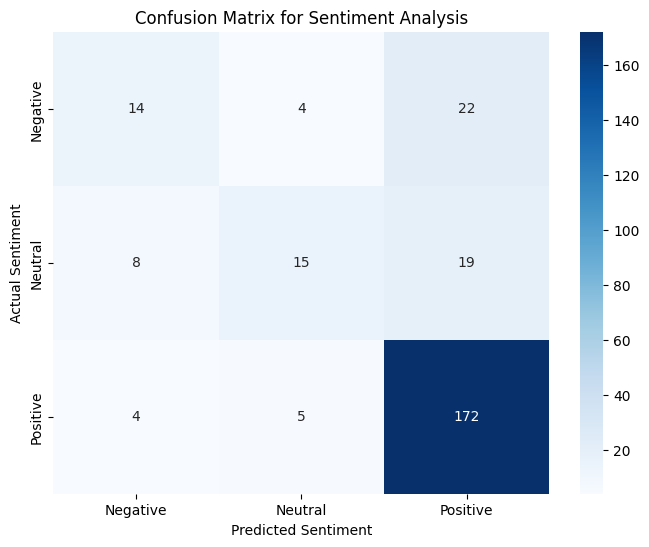

In [10]:
class_labels = {
    -1: "Negative",
    0: "Neutral",
    1: "Positive"
}

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=[class_labels[i] for i in class_labels.keys()],
    yticklabels=[class_labels[i] for i in class_labels.keys()],
)

plt.xlabel("Predicted Sentiment")
plt.ylabel("Actual Sentiment")
plt.title("Confusion Matrix for Sentiment Analysis")
plt.show()

In [11]:
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Precision: 0.7374
Recall: 0.7643


<h3>F1 score</h3>

F1 score is the harmonic between precision and recall. 

In [12]:
f1 = f1_score(y_test, y_pred, average="weighted")
print(f"F1 Score: {f1:.4f}")


F1 Score: 0.7380


<h2>PREDICTING SENTIMENT OF NEW FEEDBACK</h2>

Using gradio to simulate the uploading process and sentimental analysis.

In [13]:
def sentiment(file):
    feedbacks = pd.read_excel(file) 
    texts = feedbacks["Feedback"]

    sentiments = []
    for text in texts:
        cleaned_comment = preprocess_text(text) 
        new_features = vectorizer.transform([cleaned_comment])
        predicted_sentiment = model.predict(new_features)[0]

        if predicted_sentiment == 1:
            sentiment = "Positive"
        elif predicted_sentiment == 0:
            sentiment = "Neutral"
        elif predicted_sentiment == -1:
            sentiment = "Negative"

        sentiments.append(sentiment)

    sentiment_output = ""
    for i, row in feedbacks.iterrows(): #iterates each row 
        sentiment = sentiments[i]
        text = row["Feedback"]
        sentiment_output += f"{text}:  {sentiment}\n"  

    return sentiment_output
    
#Creating a gradio interface
app =  gr.Interface(title = "Sentiment analysis", description = "Analyzing Pamantasan ng Lungsod ng Pasig Student Sentiments Towards Professor Performance: A Naive Bayes Approach", fn = sentiment, inputs = [gr.File(label="Upload a file")], outputs = "textbox")
app.launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


Traceback (most recent call last):
  File "c:\Users\acer\Documents\GitHub\Sentimental-analysis-of-Professor-Performance\venv\Lib\site-packages\gradio\queueing.py", line 536, in process_events
    response = await route_utils.call_process_api(
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\acer\Documents\GitHub\Sentimental-analysis-of-Professor-Performance\venv\Lib\site-packages\gradio\route_utils.py", line 276, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\acer\Documents\GitHub\Sentimental-analysis-of-Professor-Performance\venv\Lib\site-packages\gradio\blocks.py", line 1923, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\acer\Documents\GitHub\Sentimental-analysis-of-Professor-Performance\venv\Lib\site-packages\gradio\blocks.py", line 1508, in call_function
    prediction = await anyio.to_thread.run_sync(  # type: ig